<a href="https://colab.research.google.com/github/SelvamRaju/Neural-Networks/blob/main/Part_1_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Domain : Electrionics and Telecommunication**

In [1]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.7.0'

In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

%matplotlib inline

import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization, Dropout

# **1. Import data**

In [3]:
#importing data from local drive
from google.colab import files
uploaded = files.upload()

Saving Part-1-Signal-Data.csv to Part-1-Signal-Data (2).csv


In [4]:
# Assinging the data to Pandas data frame
import io
df = pd.read_csv(io.BytesIO(uploaded['Part-1-Signal-Data.csv']))

# **2.Data analysis & visualisation**

In [5]:
df.shape

(1599, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
Parameter 2,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
Parameter 3,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
Parameter 4,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
Parameter 5,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
Parameter 6,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
Parameter 7,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
Parameter 8,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
Parameter 9,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
Parameter 10,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [8]:
df.dtypes.to_frame(name = 'Data Type')

,Data Type
Parameter 1,float64
Parameter 2,float64
Parameter 3,float64
Parameter 4,float64
Parameter 5,float64
Parameter 6,float64
Parameter 7,float64
Parameter 8,float64
Parameter 9,float64
Parameter 10,float64


## It is seen that all the parameter attributes are float64 types and the singal_strength filed is an int64 type.

In [9]:
# checking null values
df.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

## No null values detected in dataset.

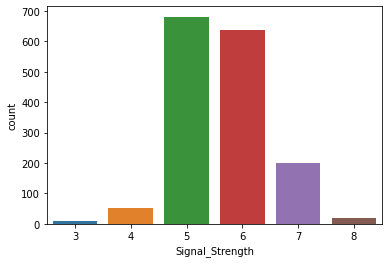

In [10]:
# Plotting the count plot for the target variable
sns.countplot(x = df.Signal_Strength)

## It is seen that most of the values resides in 5, 6 and 3, 8 being extremes

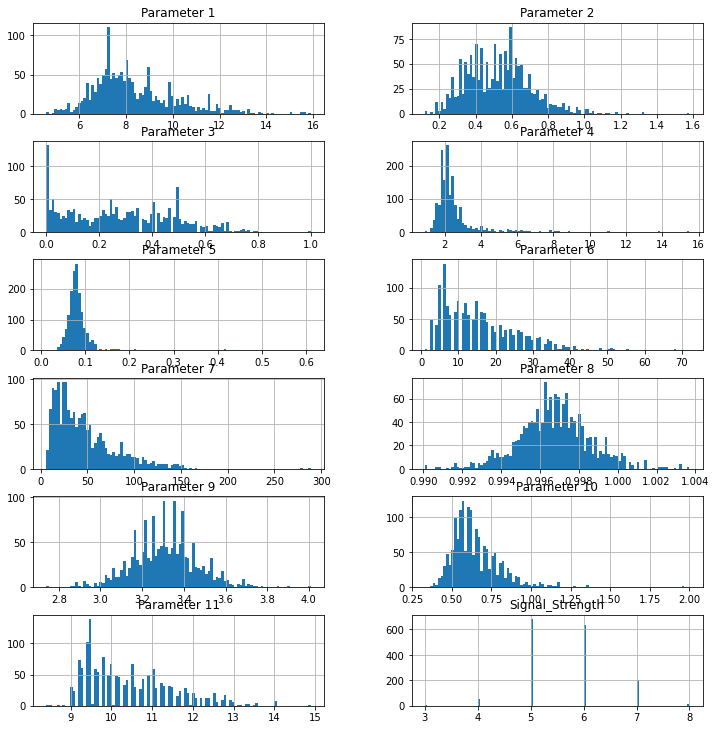

In [11]:
columns = list(df)
df[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2));

In [12]:
# Handling outliers using Z-Score
z = np.abs(stats.zscore(df))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.57920652, 0.96024611,
        0.78782264],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.1289504 , 0.58477711,
        0.78782264],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.04808883, 0.58477711,
        0.78782264],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54204194, 0.54162988,
        0.45084835],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.30598963, 0.20930812,
        0.78782264],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.01092425, 0.54162988,
        0.45084835]])

In [13]:
threshold = 3
print(np.where(z > threshold))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [14]:
# Forming new data frames after handling outliers
df_new = df[(z < threshold).all(axis=1)]

# shape of new data frame
df_new.shape

(1451, 12)

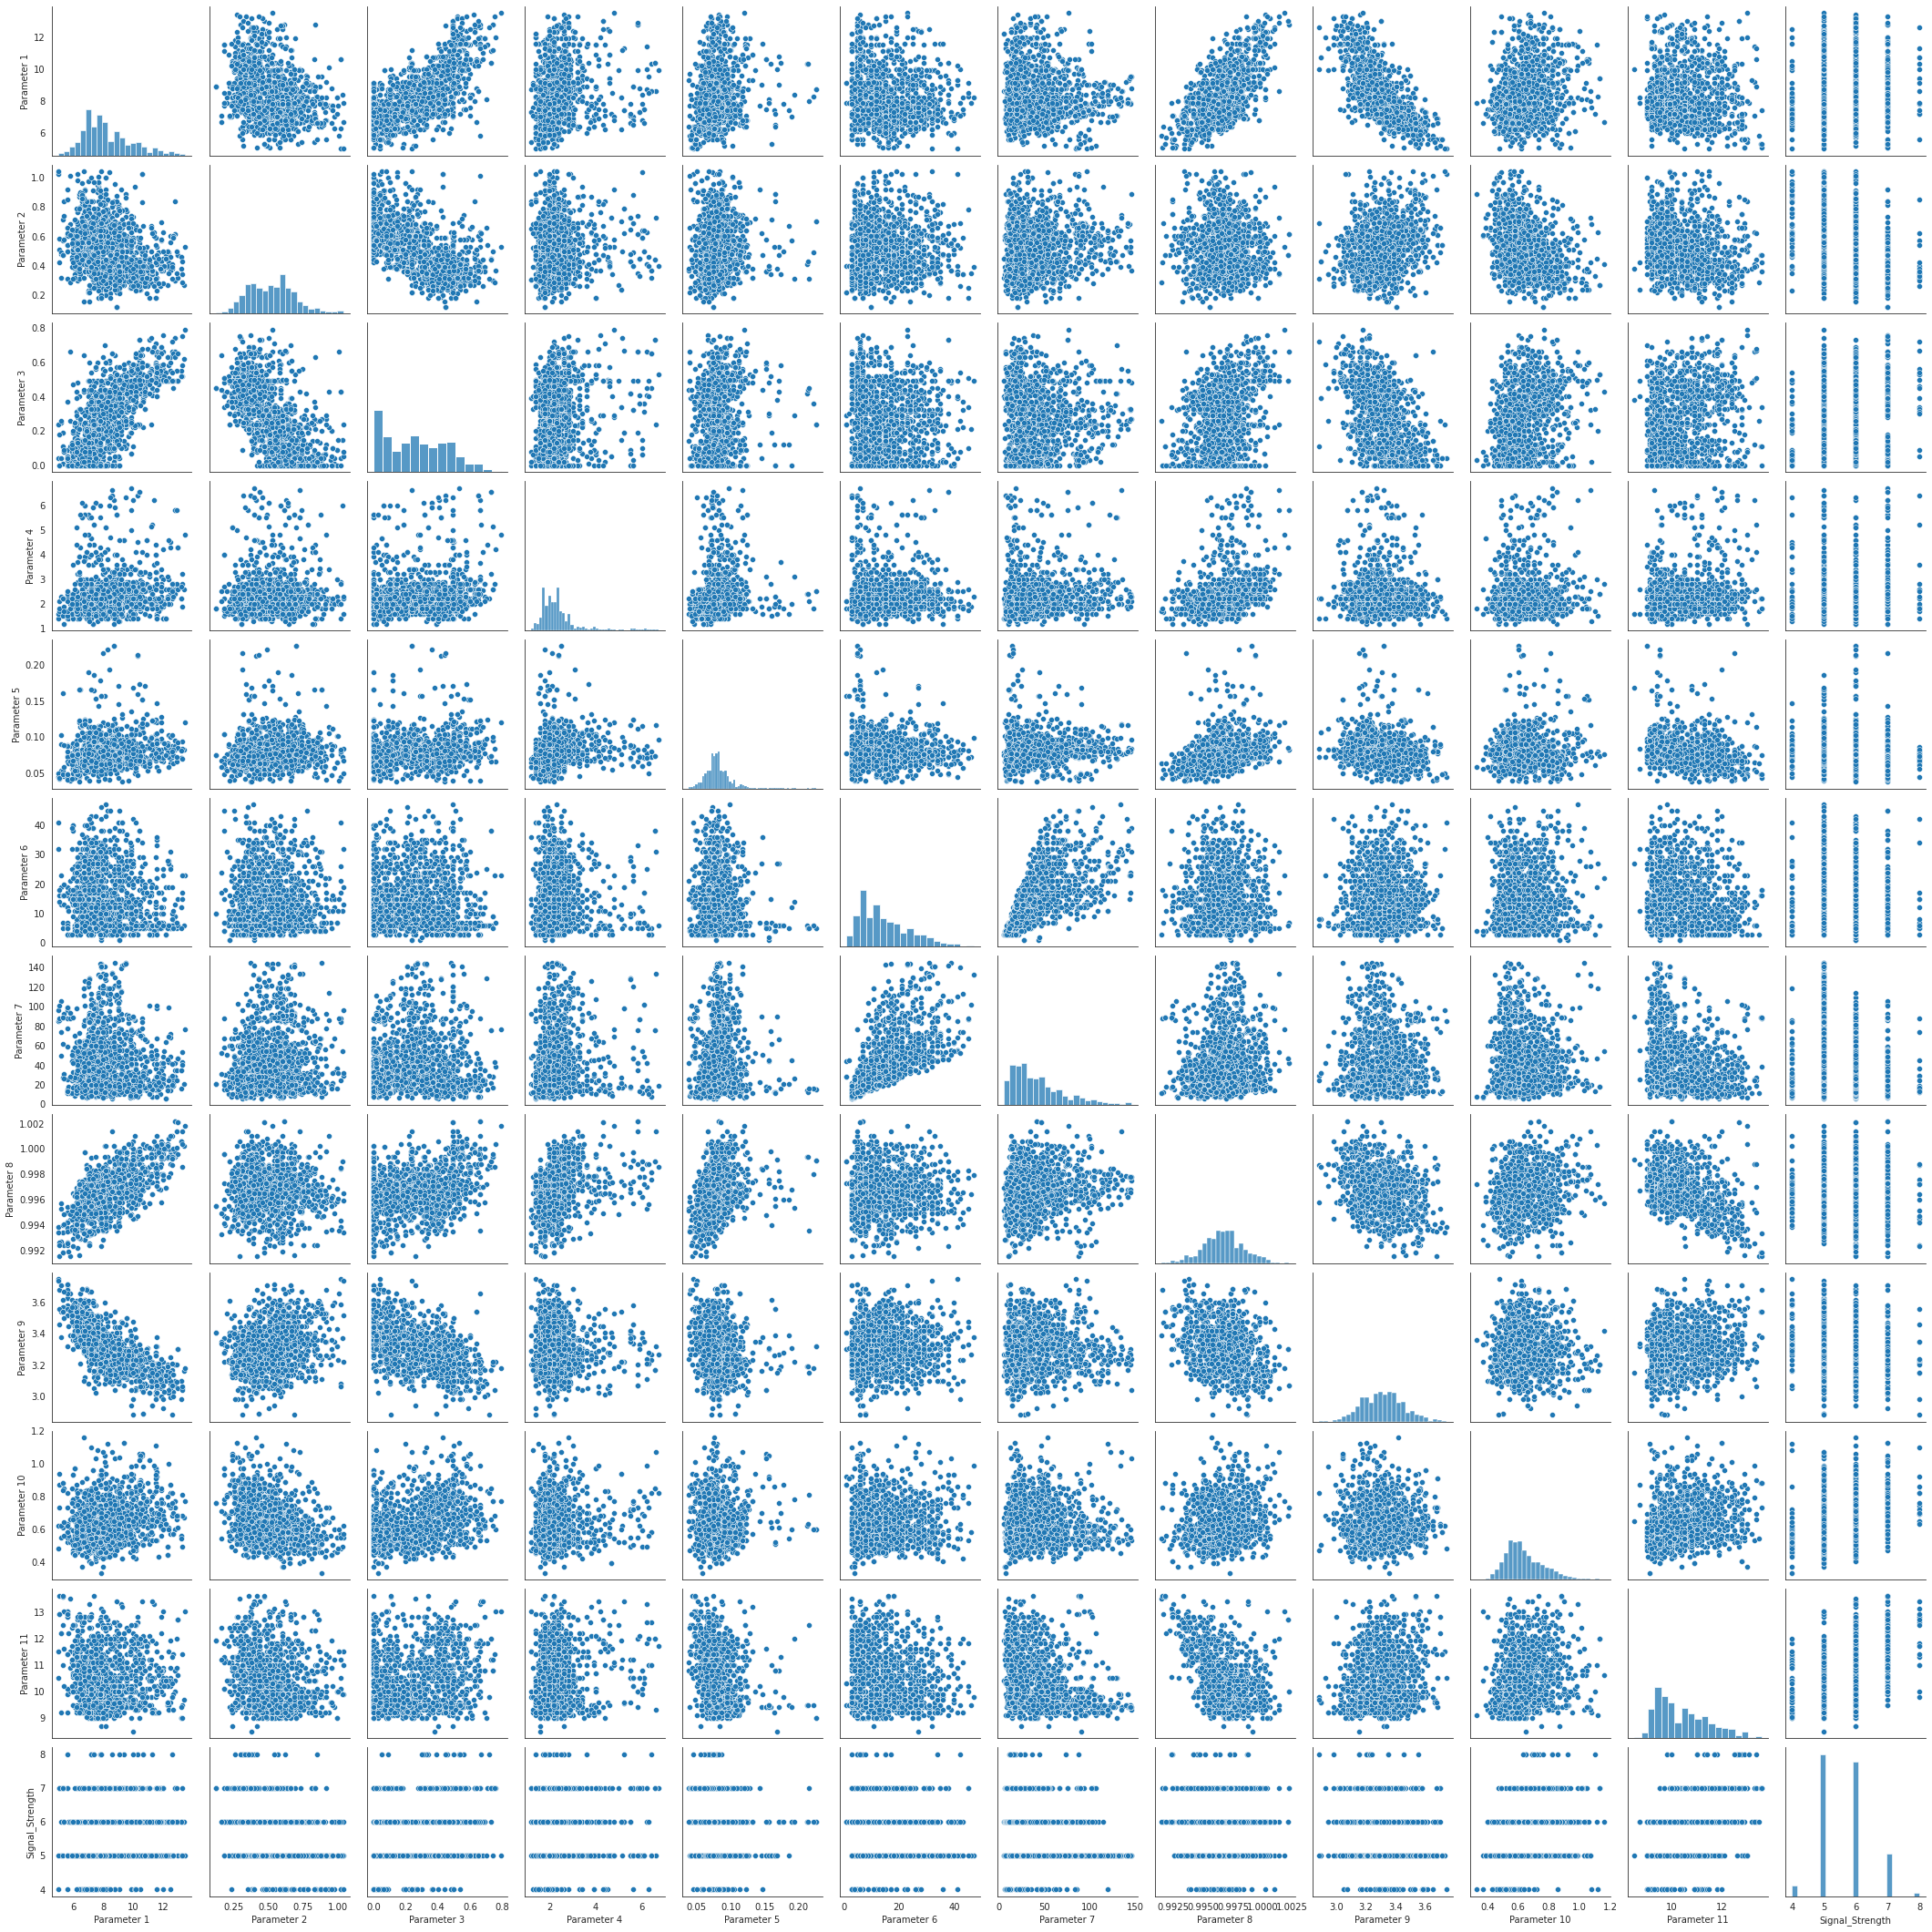

In [15]:
#Bivariate relationships of fields
sns.set_style("white")
sns.pairplot(df_new)
plt.show()

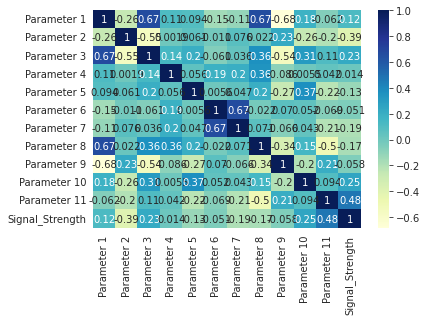

In [16]:
# Plotting the correlation heat map to understand the correlation between variables
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

# **3. Designing, training, tuning and testing a neural network regressor**

In [17]:
#Split Data
X = df_new.drop("Signal_Strength", axis=1)
y = df_new['Signal_Strength']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:

model = Sequential()

# Batch Normalizing input data
model.add(tensorflow.keras.layers.BatchNormalization(input_shape=(11,)))

model.add(Dense(200, input_dim=11, activation= "relu", kernel_initializer= "he_normal"))
model.add(BatchNormalization())
model.add(Dropout(0.2)) 
model.add(Dense(100, activation= "relu", kernel_initializer= "he_normal"))
model.add(BatchNormalization())
model.add(Dropout(0.2)) 
model.add(Dense(50, activation= "relu", kernel_initializer= "he_normal"))
model.add(BatchNormalization())
model.add(Dropout(0.2)) 

# Output node
model.add(Dense(1))

In [20]:
# Printing the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 11)               44        
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 200)               2400      
                                                                 
 batch_normalization_1 (Batc  (None, 200)              800       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)              4

In [21]:
model.compile(loss= 'mse' , optimizer='adam', metrics='mse')
result = model.fit(X_train, y_train, batch_size=10, validation_split=0.2, epochs=100);

Epoch 1/100
82/82 [==============================] - 2s 6ms/step - loss: 30.5260 - mse: 30.5260 - val_loss: 22.3351 - val_mse: 22.3351
Epoch 2/100
82/82 [==============================] - 0s 3ms/step - loss: 23.1035 - mse: 23.1035 - val_loss: 17.1274 - val_mse: 17.1274
Epoch 3/100
82/82 [==============================] - 0s 4ms/step - loss: 14.1587 - mse: 14.1587 - val_loss: 7.8005 - val_mse: 7.8005
Epoch 4/100
82/82 [==============================] - 0s 4ms/step - loss: 6.1308 - mse: 6.1308 - val_loss: 2.6639 - val_mse: 2.6639
Epoch 5/100
82/82 [==============================] - 0s 4ms/step - loss: 2.9412 - mse: 2.9412 - val_loss: 1.2322 - val_mse: 1.2322
Epoch 6/100
82/82 [==============================] - 0s 4ms/step - loss: 2.2345 - mse: 2.2345 - val_loss: 1.3823 - val_mse: 1.3823
Epoch 7/100
82/82 [==============================] - 0s 4ms/step - loss: 2.0996 - mse: 2.0996 - val_loss: 0.7383 - val_mse: 0.7383
Epoch 8/100
82/82 [==============================] - 0s 4ms/step - loss: 

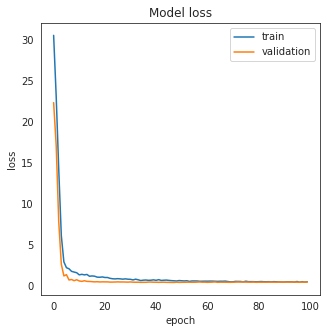

In [22]:
# Visulaize the metrics 
plt.figure(figsize=(5,5))
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [23]:
pred_train= model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred= model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

0.5650937524799711
0.6433147555293145


It is seen that mean squared error is 0.64 for test data and 0.55 for training data without much difference between train and test. Lesser mean squared error based model is the effective model.

## **4.Model Pickle Process** - Choosing Joblib since its simple and efficient 

In [24]:
import joblib 

In [25]:
# Following dump process will dump the pickled binary file in colab memory. This can also be configured to dump to drive directly
joblib.dump(model, 'Part-1-NN-Pickle')

INFO:tensorflow:Assets written to: ram://230f6ef4-0538-402a-9484-d46fab208300/assets


['Part-1-NN-Pickle']